In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


### Exercise 01.1
ho testato il generatore di numeri casuali trovando:
- media
- varianza
- chi quadro

per quanto riguarda il calcolo della media e della varianza:
- ho generato $10^5$ numeri casuali
- ho calcolato la media e la varianza con il metodo a blocchi, dividendo i numeri casuali in $10^3$ blocchi ognuno "composto" da $10^2$ numeri casuali
- ho poi calcolato la media e la varianza progressiva aggiungendo un blocco alla volta e ho graficato i risultati

per quanto riguarda il calcolo del chi quadro: 
- ho calcolato il valore di $\chi^2$ partendo da $10^4$ numeri casuali
- ho calcolato in questo modo 100 valori diversi di $\chi^2$ 
- ho plottato i risultati ottenuti

possiamo notare che la media e la varianza sono in accordo con i dati attesi, invece i valori osservati del chi quadro si discostano maggiormente da quelli attesi.
infatti il chi quadro calcolato ha un valore inferiore rispetto all'atteso, questo perchè i numeri generati non sono del tutto casuali ma pseudocasuali.

Text(0.5, 1.0, '$\\chi^2$')

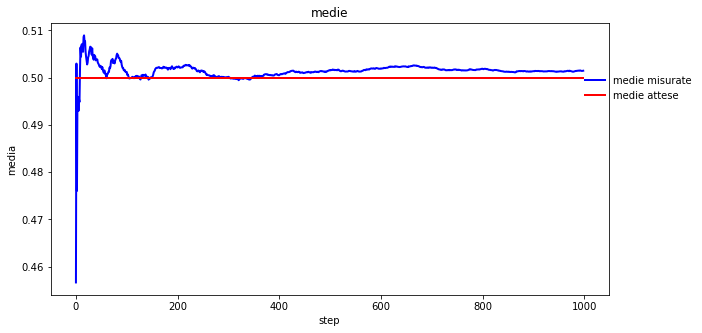

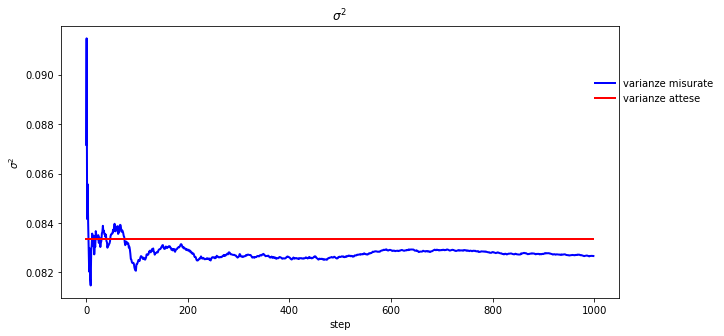

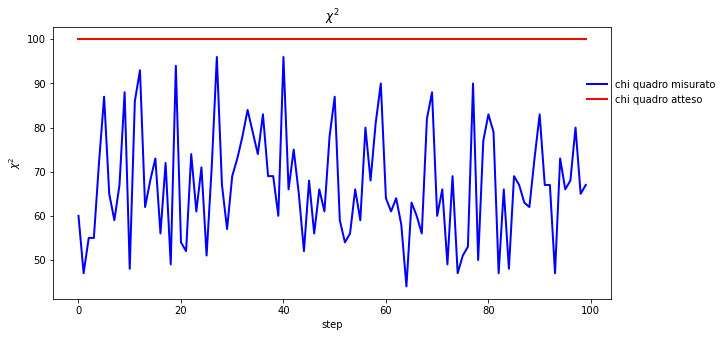

In [5]:
f=open("medie_smooth")
lines=f.readlines()
medie=[]
for i in lines:
    medie.append(float(i))
f.close()

f=open("var_smooth")
lines=f.readlines()
var=[]
for i in lines:
    var.append(float(i))
f.close()

x=np.arange(0, len(medie),1)

medie_att=np.zeros(len(medie))+1/2
var_att=np.zeros(len(var))+1/12

fig,g=plt.subplots(1, 1, figsize=(10, 5))
g.plot(x, medie,color="blue",lw=2,label="medie misurate");
g.plot(x, medie_att,color="red",lw=2,label="medie attese");
g.set_xlabel("step")
g.set_ylabel("media")
g.legend(loc=(0.95, 0.7), frameon=False)
g.set_title("medie") 


fig,g2=plt.subplots(1, 1, figsize=(10, 5))
g2.plot(x, var,color="blue",lw=2,label="varianze misurate");
g2.plot(x, var_att,color="red",lw=2,label="varianze attese");
g2.set_xlabel("step")
g2.set_ylabel("$\sigma^2$")
g2.legend(loc=(0.95, 0.7), frameon=False)
g2.set_title("$\sigma^2$") 

f=open("chi_2")
lines=f.readlines()
chi_2=[]
for i in lines:
    chi_2.append(float(i))
f.close()

x=np.arange(0, len(chi_2),1)
chi_2_att=np.zeros(len(chi_2))+100

fig,g3=plt.subplots(1, 1, figsize=(10, 5))
g3.plot(x, chi_2,color="blue",lw=2,label="chi quadro misurato");
g3.plot(x, chi_2_att,color="red",lw=2,label="chi quadro atteso");
g3.set_xlabel("step")
g3.set_ylabel("$\chi^2$")
g3.legend(loc=(0.95, 0.7), frameon=False)
g3.set_title("$\chi^2$") 

### Exercise 01.2
in questo esercizio abbiamo verificato il teorema del limite centrale.
il teorema del limite centrale ci dice che ogni distribuzione di probabilità con varianza finita tende ad una distribuzione gaussiana

le distribuzioni per cui abbiamo fatto questa verifica sono:
- distribuzione esponenziale
- distribuzione gaussiana
- distribuzione di Lorentz

per dimostrare il teorema:
- ho generato $10^4$ numeri (pseudo)casuali distribuiti come le distribuzioni di interesse elencate sopra. per fare ciò abbiamo usato il metodo di inversione della cumulativa per le distribuzioni esponenziali e di Lorentz e il metodo di Box Muller per la distribuzione gaussiana
- ho poi calcolato la media a blocchi in 3 modi diversi: mettendo 2, 10, 100 componenti per ogni blocco
- ho poi fatto un istogramma dei risultati ottenuti

si può notare come l'esponenziale converga a una distribuzione gaussiana all'aumentare delle componenti per ogni blocco, la distibuzione gaussiana invece rimane sempre una gaussiana ma più piccata (la varianza diminuisce all'aumentare delle componenti per ogni blocco). possiamo quindi dire di aver verificato il teorema del limite centrale.

invece per quanto riguarda la Lorentziana non si ha una convergenza ad una distribuzione Gaussiana ma rimane una lorentziana, ciò accade perchè non sono rispettate le ipotesi del teorema del limite centrale, per l'appunto la varianza della lorentziana è infinita.  

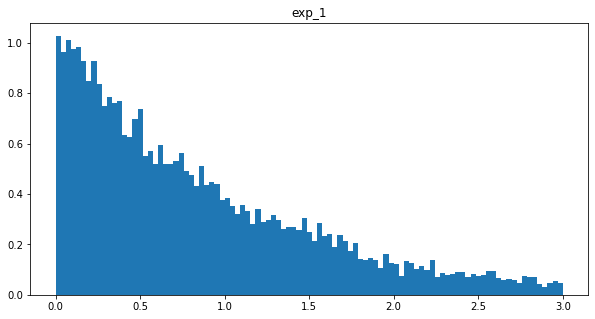

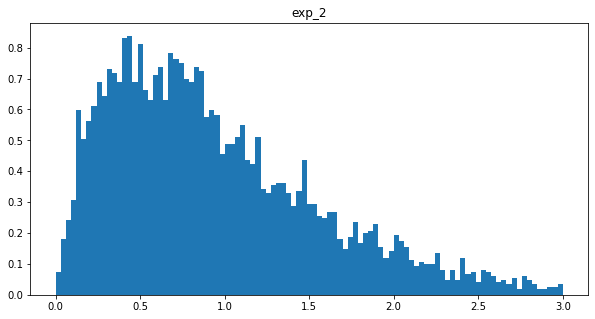

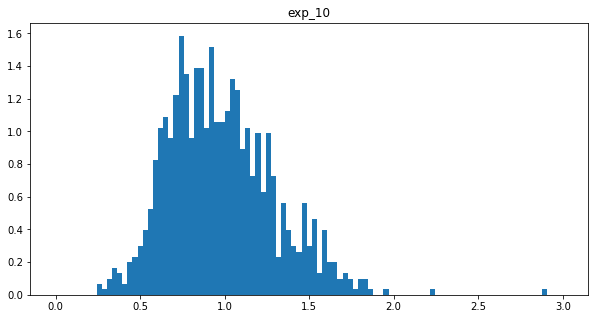

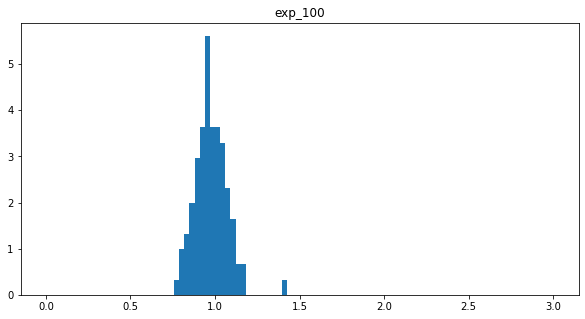

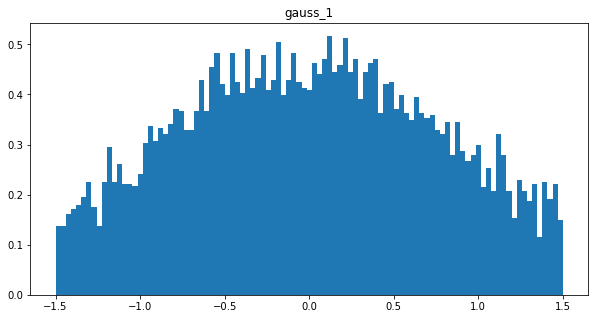

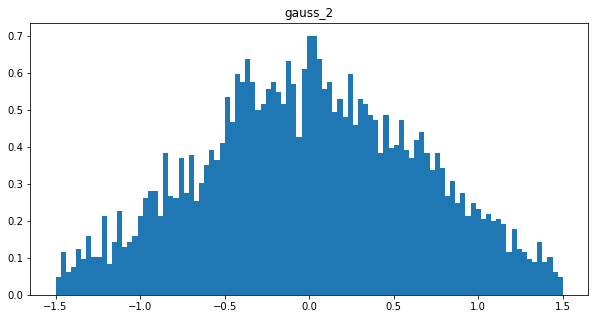

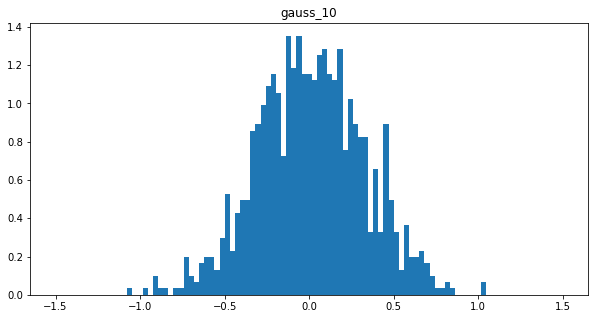

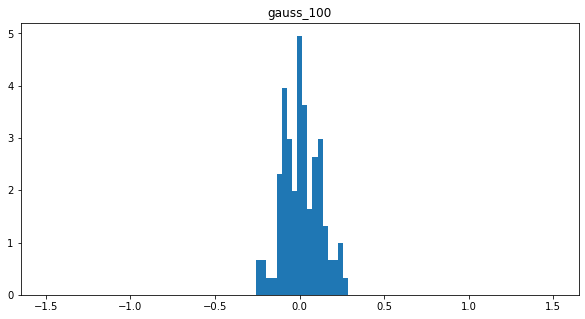

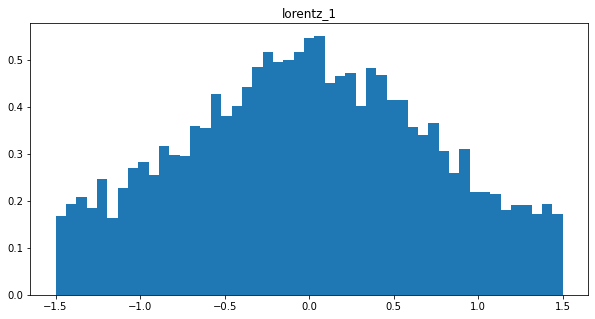

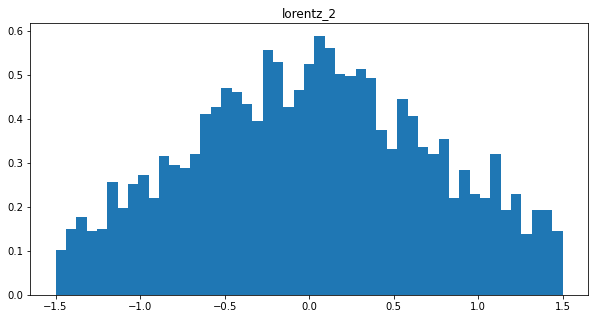

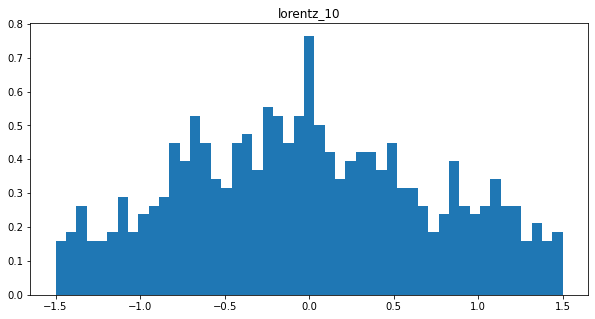

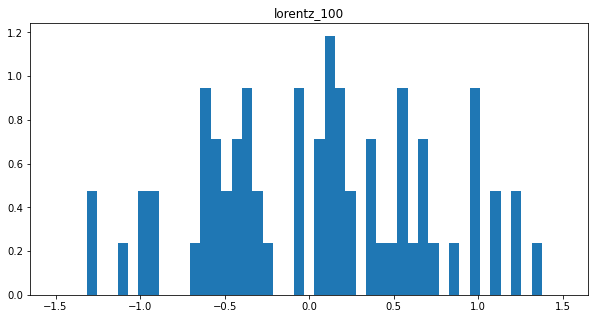

In [15]:
nomi=["exp_1", "exp_2", "exp_10", "exp_100"]

for j in nomi:
    f=open(j)
    lines=f.readlines()
    dati=[]
    for i in lines:
        dati.append(float(i))
    f.close()
    
    fig,g=plt.subplots(1, 1, figsize=(10, 5))
    g.hist(dati,bins=np.linspace(0, 3, num=100),density=True,label=i);
    g.set_title(j) 
    
    
nomi=["gauss_1", "gauss_2", "gauss_10", "gauss_100"]

for j in nomi:
    f=open(j)
    lines=f.readlines()
    dati=[]
    for i in lines:
        dati.append(float(i))
    f.close()
    
    fig,g=plt.subplots(1, 1, figsize=(10, 5))
    g.hist(dati,bins=np.linspace(-1.5, 1.5, num=100),density=True,label=i);
    g.set_title(j) 
    
nomi=["lorentz_1", "lorentz_2", "lorentz_10", "lorentz_100"]

for j in nomi:
    f=open(j)
    lines=f.readlines()
    dati=[]
    for i in lines:
        dati.append(float(i))
    f.close()
    
    fig,g=plt.subplots(1, 1, figsize=(10, 5))
    g.hist(dati,bins=np.linspace(-1.5, 1.5, num=50),density=True,label=i);
    g.set_title(j) 

### Exercise 01.3
in questo esercizio abbiamo simulato l'esperimento di Buffon per la stima di $\pi$

per fare ciò:
- ho simulato $10^5$ lanci nel seguente modo:
  - ho generato la coordinata ybar del baricentro del bastoncino come un numero casuale tra 0 e d (distanza tra le barre)
  - per determinare la direzione ho generato due numeri casuali x e y tra 0 e l/2 e ho accettato la coppia solo se soddisfavano la relazione $x^2 + y^2 < l/2$. ho quindi determinato la direzione usando l'espressione $\frac{y}{\sqrt{(x^2+y^2)}}$ al posto del seno
  - ho determinato la proiezione sull'asse y di un estremo del bastoncino con la formula $Y=\frac{l}{2} * \frac{y}{\sqrt{(x^2+y^2)}}$
- ho controllato e tenuto conto di quante volte la proiezione sull'asse y dell'estremo del bastoncino cadesse all'interno (fallimento) o all'esterno (successo) delle barre
- ho ottenuto 100 stime di $\pi$ con la formula $\pi = \frac{2*L*prove}{successi*d}$ sfruttando per ugni calcolo 100 lanci
- ha calcolato la media e la varianza progressiva e fatto un grafico dei risultati

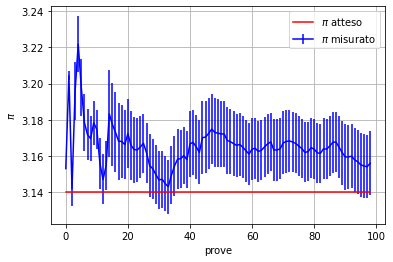

In [16]:
PI=np.loadtxt("PI_media")
var=np.loadtxt("PI_var")
x=np.arange(0, len(PI),1)
att=np.zeros(len(PI))+3.14

plt.errorbar(x,PI,yerr=var, color="blue", label="$\pi$ misurato")
plt.plot(x,att,color="red", label="$\pi$ atteso")
plt.xlabel('prove')
plt.ylabel("$\pi$")
plt.grid(True)
plt.legend()
plt.show()